In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import requests
import spacy
import nltk
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from collections import Counter
from PIL import Image
from io import BytesIO
from transformers import BertModel, BertTokenizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.preprocessing import StandardScaler

from keras.applications.vgg16 import VGG16

2023-11-28 23:26:32.222490: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wtyjoycee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wtyjoycee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wtyjoycee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wtyjoycee/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
product_data_cluster = pd.read_csv("product_data_cluster.csv")
product_data_cluster.head(2)

,Unnamed: 0,Category,ID,Product Name,Price,Shipping Location,Product Description,Store Name,Store Link,Product Link,Product Image,processed_Name,Nouns,Labels,functional_nouns,Labels_functional,Cluster,Cluster_Name
0,0,Health protective gear,733229857662,Cotton knee warm old cold legs men and women j...,5.94,"Hangzhou, Zhejiang",Free shipping free factory shipping,Daily sale factory shop,'https://store.taobao.com/shop/view_shop.htm?a...,'https://item.taobao.com/item.htm?id=733229857662,'https://g-search2.alicdn.com/img/bao/uploaded...,cotton knee warm old cold leg men woman joint ...,"['cotton', 'knee', 'leg', 'men', 'woman', 'joi...",cotton,"['cotton', 'knee', 'leg', 'men', 'woman', 'sum...",cotton,71,"cold, knee"
1,1,fitness,742827915487,Healthy belly wheel automatic rebound abdomina...,20.72,"Hangzhou, Zhejiang",Free shipping from Amoy factory,Daily sale factory shop,'https://store.taobao.com/shop/view_shop.htm?a...,'https://item.taobao.com/item.htm?id=742827915487,'https://g-search2.alicdn.com/img/bao/uploaded...,healthy belly wheel automatic rebound abdomina...,"['rebound', 'retraction', 'exercise', 'men', '...",rebound,"['belly', 'wheel', 'retraction', 'exercise', '...",belly,25,"abdominal, fitness"


In [12]:
df = product_data_cluster[['Cluster', 'Category']]

In [19]:
import pandas as pd

# Assuming your DataFrame 'df' has 'Cluster' and 'Category' columns
pivot_table = pd.pivot_table(df, index='Category', columns='Cluster', aggfunc='size', fill_value=0)

# Convert pivot table to a matrix for the heatmap
category_cluster_matrix = pivot_table.values


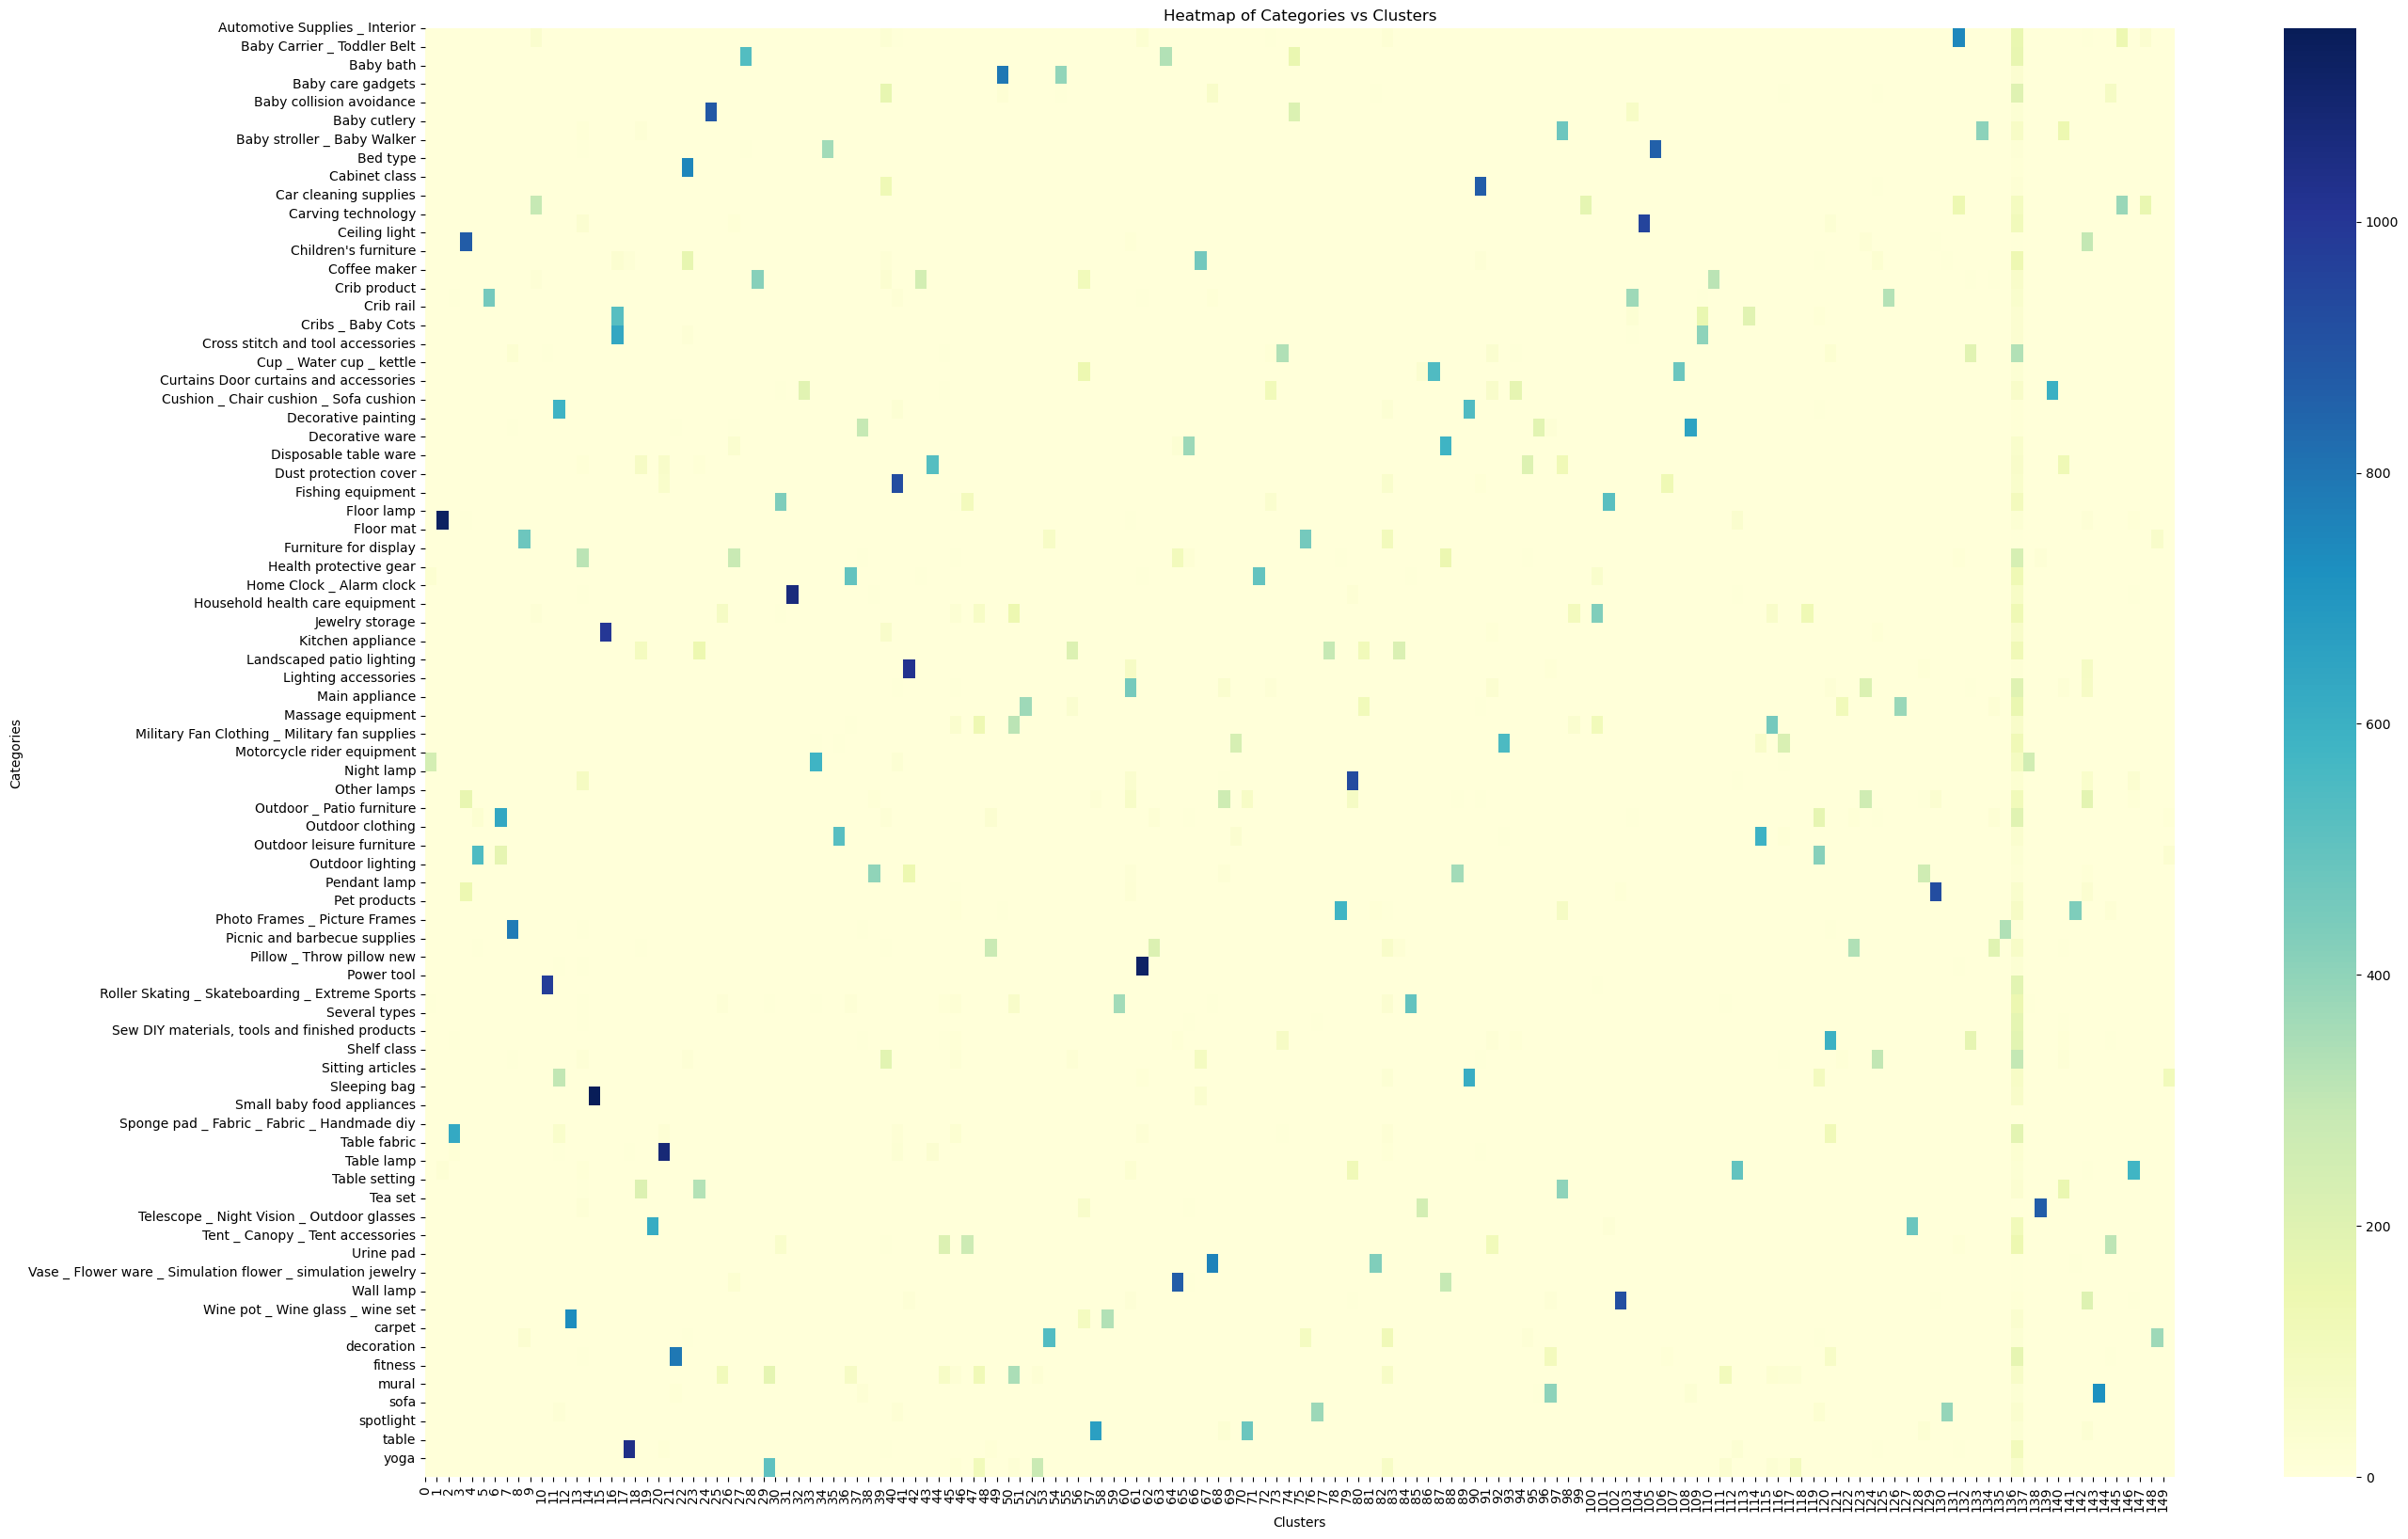

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))  # Adjust the figure size as needed
ax = sns.heatmap(category_cluster_matrix, annot=False, cmap="YlGnBu")

ax.set_title("Heatmap of Categories vs Clusters")
ax.set_xlabel("Clusters")
ax.set_ylabel("Categories")

# Set the tick labels for clusters
cluster_labels = [f"{i}" for i in pivot_table.columns]
ax.set_xticks(range(len(cluster_labels)))
ax.set_xticklabels(cluster_labels, rotation=90)

# Set the tick labels for categories
category_labels = pivot_table.index.tolist()
ax.set_yticks(range(len(category_labels)))
ax.set_yticklabels(category_labels, rotation=0)

plt.show()


In [23]:
+--------------------------------------------------+
|                    Products                      |
| Product X    Product Y    Product Z    Product S |
+--------------------------------------------------+
       |             |           |            |
       v             v           v            v
+-------------+ +-------------+ +-------------+ +-------------+
|   Step 1:   | |   Step 1:   | |   Step 1:   | |   Step 1:   |
| Text        | | Text        | | Text        | | Text        |
| Extraction  | | Extraction  | | Extraction  | | Extraction  |
+-------------+ +-------------+ +-------------+ +-------------+
       |             |           |            |
       |             |           |            |
       v             v           v            v
+-------------+ +-------------+ +-------------+ +-------------+
|   Step 2:   | |   Step 2:   | |   Step 2:   | |   Step 2:   |
| Image       | | Image       | | Image       | | Image       |
| Classification| | Classification| | Classification| | Classification|
+-------------+ +-------------+ +-------------+ +-------------+
       |             |           |            |
       |             |           |            |
       v             v           v            v
+--------------------------------------------------------------+
|                           Step 3:                            |
|                  Price Analysis & Search Engine              |
|                                                              |
|   Search Results:                                            |
|   - Recommended Product 1                                    |
|   - Recommended Product 2                                    |
|   - Recommended Product 3                                    |
|   - Recommended Product 4                                    |
|   - Recommended Product 5                                    |
+--------------------------------------------------------------+


SyntaxError: invalid syntax (1217977927.py, line 1)

In [3]:
lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english'))

In [4]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(lemmatized)

# Apply the preprocessing to each description
product_data_cluster['processed_Name'] = product_data_cluster['Product Name'].apply(preprocess_text)
product_data_cluster['processed_Category'] = product_data_cluster['Category'].apply(preprocess_text)

In [5]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(product_data_cluster['processed_Name'].astype(str).tolist())

In [6]:
num_clusters = 150  
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

product_data_cluster['Cluster'] = clusters

In [9]:
# Assuming your DataFrame 'df' has 'Cluster' (with 150 unique values) and 'Category' (with 71 unique values) columns
pivot_table = pd.pivot_table(df, index='Cluster', columns='Category', aggfunc='size', fill_value=0)

# Convert pivot table to a matrix for the heatmap
cluster_category_matrix = pivot_table.values


In [7]:
def download_image(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        return Image.open(BytesIO(response.content))
    except requests.RequestException as e:
        print(f"Error downloading {url}: {e}")
        return None

def preprocess_image(image, target_size=(224, 224)):
    if image is not None:
        # Resize and convert to RGB
        image = image.resize(target_size).convert('RGB')
        # Convert to array
        image_array = np.array(image)
        # Normalize the image array
        image_array = image_array.astype('float32') / 255.0
        return image_array
    else:
        return None

def process_and_store_images(df, image_column_name):
    # Create an empty list to store image arrays
    image_arrays = []
    
    # Loop over each row in the DataFrame
    for index, row in df.iterrows():
        # Download and preprocess the image
        image_url = row[image_column_name].strip("'")
        image = download_image(image_url)
        processed_image = preprocess_image(image)
        
        # Append the processed image to the list, or None if the image couldn't be processed
        image_arrays.append(processed_image if processed_image is not None else None)
    
    # Assign the list of image arrays as a new column in the DataFrame
    df['image_array'] = image_arrays


In [ ]:
process_and_store_images(product_data_cluster, 'Product Image')

In [ ]:
product_data_cluster.to_csv('product_data_images')

In [15]:
# Load a pre-trained VGG16 model without the top classification layer
model = VGG16(weights='imagenet', include_top=False)

def extract_features(image, model):
    features = model.predict(image.reshape((1, image.shape[0], image.shape[1], image.shape[2])))
    return features.flatten()

cluster_features = {cluster: [extract_features(image, model) for image in images] for cluster, images in clustered_images.items()}

array(['decoration', 'fishing tools', 'jacket', 'alarm', 'cup', 'kennel',
       'cushion', 'lamp', 'cleaning stuff', 'tent', 'blanket',
       'steam cooker', 'screwdriver', 'interior', 'stove',
       'anticollision protector', 'mat', 'cover', 'pad', 'desk',
       'bowal and plant', 'massage', 'storage', 'curtain', 'coffee maker',
       'telescope', 'needle', 'box', 'cable', 'embroidery',
       'washing machine', 'broad', 'moxibustion'], dtype=object)